In [585]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, r2_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import StackingRegressor
import lightgbm as lgb
from sklearn.ensemble import StackingClassifier

In [586]:
world = pd.read_csv('world.csv') 
country = pd.read_csv('country.csv') 

In [587]:
world.head()

,Year,Agriculture_Hg,Buildings_Hg,Power industry_Hg,Transport_Hg,Waste_Hg,Other industrial combustion_Hg,Other_Hg,Agriculture_PM,Buildings_PM,...,SSTA_Minimum,SSTA_Maximum,SSTA_Frequency,SSTA_Frequency_Standard_Deviation,SSTA_FrequencyMax,SSTA_FrequencyMean,SSTA_DHW,SSTA_DHW_Standard_Deviation,SSTA_DHWMax,SSTA_DHWMean
0,1983,0.0,6.29,64.96,3.64,66.27,28.69,89.36,3753672.91,21295890.11,...,-3.25,2.69,5.0,4.58,23.0,4.0,4.41,2.68,18.24,1.51
1,1983,0.0,6.29,64.96,3.64,66.27,28.69,89.36,3753672.91,21295890.11,...,-3.00,3.49,14.0,7.79,36.0,6.0,13.12,4.01,23.05,2.14
2,1983,0.0,6.29,64.96,3.64,66.27,28.69,89.36,3753672.91,21295890.11,...,-3.11,2.90,1.0,4.49,22.0,4.0,0.00,2.43,13.47,1.46
3,1983,0.0,6.29,64.96,3.64,66.27,28.69,89.36,3753672.91,21295890.11,...,-3.03,3.72,24.0,9.11,48.0,7.0,23.52,5.08,26.59,2.62
4,1983,0.0,6.29,64.96,3.64,66.27,28.69,89.36,3753672.91,21295890.11,...,-3.13,3.68,24.0,9.78,48.0,7.0,22.82,5.11,25.53,2.82


In [588]:
country.head()

,Latitude_Degrees,Longitude_Degrees,Country,Exposure,Turbidity,Year,Substrate_Name,Percent_Bleaching,Temperature_Kelvin,Temperature_Mean,...,SSTA_DHW,SSTA_DHW_Standard_Deviation,SSTA_DHWMax,SSTA_DHWMean,Human Development Index (HDI),Life expectancy at birth,Expected years of schooling,Mean years of schooling,GNI per capita rank minus HDI rank,HDI rank
0,17.1684,-61.8183,0,1,0.0708,2004.0,1,0.0,302.48,300.22,...,0.00,2.71,18.89,1.43,0.851,77.6,15.5,11.6,10,51
1,17.1684,-61.8183,0,1,0.0708,2004.0,2,0.0,302.48,300.22,...,0.00,2.71,18.89,1.43,0.851,77.6,15.5,11.6,10,51
2,17.7353,-61.8522,0,0,0.0758,2003.0,1,5.0,300.79,300.13,...,1.01,2.49,16.89,1.44,0.851,77.6,15.5,11.6,10,51
3,17.7353,-61.8522,0,0,0.0758,2003.0,2,5.0,300.79,300.13,...,1.01,2.49,16.89,1.44,0.851,77.6,15.5,11.6,10,51
4,17.0675,-61.6653,0,0,0.0310,2003.0,1,40.0,301.38,300.19,...,0.88,2.43,15.32,1.23,0.851,77.6,15.5,11.6,10,51


In [589]:
country.columns

Index(['Latitude_Degrees', 'Longitude_Degrees', 'Country', 'Exposure',
       'Turbidity', 'Year', 'Substrate_Name', 'Percent_Bleaching',
       'Temperature_Kelvin', 'Temperature_Mean', 'Temperature_Minimum',
       'Temperature_Maximum', 'Temperature_Kelvin_Standard_Deviation', 'SSTA',
       'SSTA_Standard_Deviation', 'SSTA_Mean', 'SSTA_Minimum', 'SSTA_Maximum',
       'SSTA_Frequency', 'SSTA_Frequency_Standard_Deviation',
       'SSTA_FrequencyMax', 'SSTA_FrequencyMean', 'SSTA_DHW',
       'SSTA_DHW_Standard_Deviation', 'SSTA_DHWMax', 'SSTA_DHWMean',
       'Human Development Index (HDI) ', 'Life expectancy at birth',
       'Expected years of schooling', 'Mean years of schooling',
       'GNI per capita rank minus HDI rank', 'HDI rank'],
      dtype='object')

In [590]:
world.columns

Index(['Year', 'Agriculture_Hg', 'Buildings_Hg', 'Power industry_Hg',
       'Transport_Hg', 'Waste_Hg', 'Other industrial combustion_Hg',
       'Other_Hg', 'Agriculture_PM', 'Buildings_PM', 'Power industry_PM',
       'Transport_PM', 'Waste_PM', 'Other industrial combustion_PM',
       'Other_PM', 'Agriculture_NOx', 'Buildings_NOx', 'Power industry_NOx',
       'Transport_NOx', 'Waste_NOx', 'Other industrial combustion_NOx',
       'Other_NOx', 'Agriculture_OC', 'Buildings_OC', 'Power industry_OC',
       'Transport_OC', 'Waste_OC', 'Other industrial combustion_OC',
       'Other_OC', 'Agriculture_SO2', 'Buildings_SO2', 'Power industry_SO2',
       'Transport_SO2', 'Waste_SO2', 'Other industrial combustion_SO2',
       'Other_SO2', 'Latitude_Degrees', 'Longitude_Degrees', 'Exposure',
       'Substrate_Name', 'Percent_Bleaching', 'Temperature_Kelvin',
       'Temperature_Mean', 'Temperature_Minimum', 'Temperature_Maximum',
       'Temperature_Kelvin_Standard_Deviation', 'SSTA',
      

All of our categorical variables are encoded already. We don't need to scale our longitude and latitude. We will scale our other features. 

Round One of modeling! Here we will make a linear regression moodel with scaled features. 

In [593]:
scaler = StandardScaler()
lr = LinearRegression()
X_c = country2.drop('Percent_Bleaching', axis=1) 
X_w = world2.drop('Percent_Bleaching', axis=1) 
y_c = country2['Percent_Bleaching']
y_w = world2['Percent_Bleaching']
Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_c, y_c, test_size=0.2, random_state=42) 
Xw_train, Xw_test, yw_train, yw_test = train_test_split(X_w, y_w, test_size=0.2, random_state=42) 

In [594]:
model = make_pipeline(scaler, lr)

In [595]:
model.fit(Xc_train, yc_train)
yc_pred = model.predict(Xc_test) 
r2_c = r2_score(yc_test, yc_pred) 
mae_c = mean_absolute_error(yc_test, yc_pred) 
mse_c = mean_squared_error(yc_test, yc_pred) 
rmse_c = np.sqrt(mse_c)


print(f'R Squared Score: {r2_c}') 
print(f'Mean Absolute Error: {mae_c}') 
print(f'Mean Squared Error: {mse_c}') 
print(f'RMSE: {rmse_c}')


R Squared Score: 0.32788808875943676
Mean Absolute Error: 9.83621857571663
Mean Squared Error: 246.90711371572505
RMSE: 15.713278261258058


In [596]:
dummy = DummyRegressor(strategy="mean")
dummy.fit(Xc_train, yc_train)
y_dummy = dummy.predict(Xc_test)
print(f'Dummy R²: {r2_score(yc_test, y_dummy)}')

Dummy R²: -0.0005769304013851784


In [597]:
model.fit(Xw_train, yw_train)
yw_pred = model.predict(Xw_test) 
r2_w = r2_score(yw_test, yw_pred) 
mae_w = mean_absolute_error(yw_test, yw_pred) 
mse_w = mean_squared_error(yw_test, yw_pred) 
rmse_w = np.sqrt(mse_w)



print(f'R Squared Score: {r2_w}') 
print(f'Mean Absolute Error: {mae_w}') 
print(f'Mean Squared Error: {mse_w}') 
print(f'RMSE: {rmse_w}')


R Squared Score: 0.3415320096597302
Mean Absolute Error: 9.468765811303784
Mean Squared Error: 231.17358435524864
RMSE: 15.204393587224997


In [598]:
dummy = DummyRegressor(strategy="mean")
dummy.fit(Xc_train, yc_train)
y_dummy = dummy.predict(Xc_test)
print(f'Dummy R²: {r2_score(yc_test, y_dummy)}')

Dummy R²: -0.0005769304013851784


The linear model explains some of the variance compared to the dummy baseline. From the MAE in both models, we see that the linear model can predict bleaching within 10 percentage points. This isn't ideal for our environmental model. Let's try some other models and see how they compare!

In [600]:
model2 = make_pipeline(scaler, Ridge(alpha=1.0))

In [601]:
model2.fit(Xc_train, yc_train)
yc_pred = model2.predict(Xc_test) 
r2_c = r2_score(yc_test, yc_pred) 
mae_c = mean_absolute_error(yc_test, yc_pred) 
mse_c = mean_squared_error(yc_test, yc_pred) 
rmse_c = np.sqrt(mse_c)



print(f'R Squared Score: {r2_c}') 
print(f'Mean Absolute Error: {mae_c}') 
print(f'Mean Squared Error: {mse_c}')
print(f'RMSE: {rmse_c}')

R Squared Score: 0.32788696091579794
Mean Absolute Error: 9.836296344385904
Mean Squared Error: 246.9075280405018
RMSE: 15.713291445158834


In [602]:
model2.fit(Xw_train, yw_train)
yw_pred = model2.predict(Xw_test) 
r2_w = r2_score(yw_test, yw_pred) 
mae_w = mean_absolute_error(yw_test, yw_pred) 
mse_w = mean_squared_error(yw_test, yw_pred) 
rmse_w = np.sqrt(mse_w)


print(f'R Squared Score: {r2_w}') 
print(f'Mean Absolute Error: {mae_w}') 
print(f'Mean Squared Error: {mse_w}') 
print(f'RMSE: {rmse_w}')

R Squared Score: 0.34070013841044045
Mean Absolute Error: 9.472082467993385
Mean Squared Error: 231.46563599821616
RMSE: 15.213994741625756


The Ridge and Linear Regression model is almost the same. 

In [604]:
model3 = make_pipeline(scaler, SVR(kernel="rbf", C=1.0, epsilon=0.1)) 

In [605]:
model3.fit(Xc_train, yc_train)
yc_pred = model3.predict(Xc_test) 
r2_c = r2_score(yc_test, yc_pred) 
mae_c = mean_absolute_error(yc_test, yc_pred) 
mse_c = mean_squared_error(yc_test, yc_pred) 
rmse_c = np.sqrt(mse_c)



print(f'R Squared Score: {r2_c}') 
print(f'Mean Absolute Error: {mae_c}') 
print(f'Mean Squared Error: {mse_c}') 
print(f'RMSE: {rmse_c}')

R Squared Score: 0.3058726671669326
Mean Absolute Error: 6.736276344070463
Mean Squared Error: 254.99470167798404
RMSE: 15.968553524912144


In [606]:
model3.fit(Xw_train, yw_train)
yw_pred = model3.predict(Xw_test) 
r2_w = r2_score(yw_test, yw_pred) 
mae_w = mean_absolute_error(yw_test, yw_pred) 
mse_w = mean_squared_error(yw_test, yw_pred) 
rmse_w = np.sqrt(mse_w)


print(f'R Squared Score: {r2_w}') 
print(f'Mean Absolute Error: {mae_w}') 
print(f'Mean Squared Error: {mse_w}')
print(f'RMSE: {rmse_w}')

R Squared Score: 0.2854244645565104
Mean Absolute Error: 6.512067198405879
Mean Squared Error: 250.87170560208773
RMSE: 15.838930064940868


The R squared for SVR model is a lot lower for both models. Let's try a NN next.   

In [608]:
model4 = make_pipeline(scaler, MLPRegressor(hidden_layer_sizes=(128, 64, 32), max_iter=500, random_state=42)) 

In [609]:
model4.fit(Xc_train, yc_train)
yc_pred = model4.predict(Xc_test) 
r2_c = r2_score(yc_test, yc_pred) 
mae_c = mean_absolute_error(yc_test, yc_pred) 
mse_c = mean_squared_error(yc_test, yc_pred) 
rmse_c = np.sqrt(mse_c)



print(f'R Squared Score: {r2_c}') 
print(f'Mean Absolute Error: {mae_c}') 
print(f'Mean Squared Error: {mse_c}') 
print(f'RMSE: {rmse_c}')

R Squared Score: 0.5809564736483332
Mean Absolute Error: 6.100477479728191
Mean Squared Error: 153.9398809668129
RMSE: 12.407251144665883


In [610]:
model4.fit(Xw_train, yw_train)
yw_pred = model4.predict(Xw_test) 
r2_w = r2_score(yw_test, yw_pred) 
mae_w = mean_absolute_error(yw_test, yw_pred) 
mse_w = mean_squared_error(yw_test, yw_pred)
rmse_w = np.sqrt(mse_w)



print(f'R Squared Score: {r2_w}') 
print(f'Mean Absolute Error: {mae_w}') 
print(f'Mean Squared Error: {mse_w}')
print(f'RMSE: {rmse_w}')

R Squared Score: 0.5890836731968567
Mean Absolute Error: 5.478590486801688
Mean Squared Error: 144.26365674675665
RMSE: 12.010980673814968


In [611]:
model5 = make_pipeline(scaler, MLPRegressor(hidden_layer_sizes=(128, 64, 32), max_iter=500, random_state=42, early_stopping=True, 
                                               n_iter_no_change=10)) 
model5_2 = make_pipeline(scaler, MLPRegressor(hidden_layer_sizes=(128, 64, 32), max_iter=500, random_state=42, early_stopping=True, 
                                               n_iter_no_change=10))

In [612]:
model5.fit(Xc_train, yc_train)
yc_pred = model5.predict(Xc_test) 
r2_c = r2_score(yc_test, yc_pred) 
mae_c = mean_absolute_error(yc_test, yc_pred) 
mse_c = mean_squared_error(yc_test, yc_pred) 
rmse_c = np.sqrt(mse_c)



print(f'R Squared Score: {r2_c}') 
print(f'Mean Absolute Error: {mae_c}') 
print(f'Mean Squared Error: {mse_c}') 
print(f'RMSE: {rmse_c}')

R Squared Score: 0.5759072172392339
Mean Absolute Error: 6.525443315619119
Mean Squared Error: 155.79477641730452
RMSE: 12.481777774712404


In [613]:
model5_2.fit(Xw_train, yw_train)
yw_pred = model5_2.predict(Xw_test) 
r2_w = r2_score(yw_test, yw_pred) 
mae_w = mean_absolute_error(yw_test, yw_pred) 
mse_w = mean_squared_error(yw_test, yw_pred) 



print(f'R Squared Score: {r2_w}') 
print(f'Mean Absolute Error: {mae_w}') 
print(f'Mean Squared Error: {mse_w}')
print(f'RMSE: {rmse_w}')

R Squared Score: 0.5872839639121981
Mean Absolute Error: 5.826466683161877
Mean Squared Error: 144.89549497159877
RMSE: 12.010980673814968


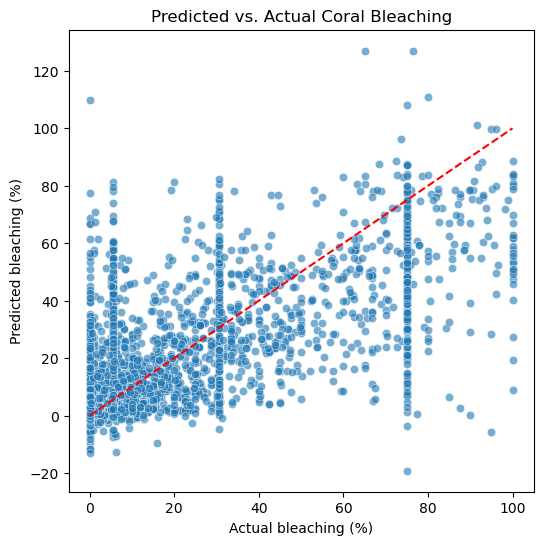

In [614]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=yc_test, y=yc_pred, alpha=0.6)
plt.plot([0,100],[0,100], color="red", linestyle="--")  # 1:1 line
plt.xlabel("Actual bleaching (%)")
plt.ylabel("Predicted bleaching (%)")
plt.title("Predicted vs. Actual Coral Bleaching")
plt.show()

Model 5 preformed slightly worse than model 4, let's try a grid search to try different combinations of layers, learning rates, alpha (for overfitting), and activation is relu. 

In [616]:
model6 = make_pipeline(scaler,MLPRegressor(max_iter=1000, random_state=42, early_stopping=True, validation_fraction=0.1))

In [617]:
param_grid = { 'mlpregressor__hidden_layer_sizes': [(256, 128, 64), (128, 64, 32)], 
              'mlpregressor__activation': ['relu'], 
              'mlpregressor__alpha': [0.0001, 0.001], 
              'mlpregressor__learning_rate_init': [0.001, 0.01]}
scoring = {'mae':'neg_mean_absolute_error', 'mse':'neg_mean_squared_error', 'r2':'r2'}
grid = GridSearchCV(estimator=model6, param_grid = param_grid, scoring =scoring, refit='r2',  cv=3) 


In [618]:
grid.fit(Xc_train, yc_train) 
print(f'Best Parameters: {grid.best_params_}')

best_nn = grid.best_estimator_
yc_pred = best_nn.predict(Xc_test)
r2_c = r2_score(yc_test, yc_pred) 
mae_c = mean_absolute_error(yc_test, yc_pred) 
mse_c = mean_squared_error(yc_test, yc_pred) 
rmse_c = np.sqrt(mse_c)



print(f'R Squared Score: {r2_c}') 
print(f'Mean Absolute Error: {mae_c}') 
print(f'Mean Squared Error: {mse_c}') 
print(f'RMSE: {rmse_c}')

Best Parameters: {'mlpregressor__activation': 'relu', 'mlpregressor__alpha': 0.0001, 'mlpregressor__hidden_layer_sizes': (256, 128, 64), 'mlpregressor__learning_rate_init': 0.001}
R Squared Score: 0.5990769627679469
Mean Absolute Error: 5.971964410371754
Mean Squared Error: 147.28313587300417
RMSE: 12.136026362570417


In [619]:
grid.fit(Xw_train, yw_train) 
print(f'Best Parameters: {grid.best_params_}')

best_nn = grid.best_estimator_
yw_pred = best_nn.predict(Xw_test) 
r2_w = r2_score(yw_test, yw_pred) 
mae_w = mean_absolute_error(yw_test, yw_pred) 
mse_w = mean_squared_error(yw_test, yw_pred) 



print(f'R Squared Score: {r2_w}') 
print(f'Mean Absolute Error: {mae_w}') 
print(f'Mean Squared Error: {mse_w}')
print(f'RMSE: {rmse_w}')

Best Parameters: {'mlpregressor__activation': 'relu', 'mlpregressor__alpha': 0.0001, 'mlpregressor__hidden_layer_sizes': (256, 128, 64), 'mlpregressor__learning_rate_init': 0.001}
R Squared Score: 0.6096140795838596
Mean Absolute Error: 5.315067440873313
Mean Squared Error: 137.05588400399847
RMSE: 12.010980673814968


Awesome! We are now up to 60 percent accuracy within 5 percentage points. I want our model to have an R squared of at least 70 percent with MSE of 5 or less. Let's see if we can accomplish this with different types of models. We will try Random Forest below. 

In [621]:
model7 = make_pipeline(scaler,RandomForestRegressor(n_estimators=200, random_state=42))
model7_2 = make_pipeline(scaler, RandomForestRegressor(n_estimators=200, random_state=42))

In [622]:
model7.fit(Xc_train, yc_train) 
yc_pred = model7.predict(Xc_test) 
r2_c = r2_score(yc_test, yc_pred) 
mae_c = mean_absolute_error(yc_test, yc_pred) 
mse_c = mean_squared_error(yc_test, yc_pred) 
rmse_c = np.sqrt(mse_c)



print(f'R Squared Score: {r2_c}') 
print(f'Mean Absolute Error: {mae_c}') 
print(f'Mean Squared Error: {mse_c}') 
print(f'RMSE: {rmse_c}')

R Squared Score: 0.6792723042108828
Mean Absolute Error: 4.726049420453955
Mean Squared Error: 117.82256545613016
RMSE: 10.854610331841958


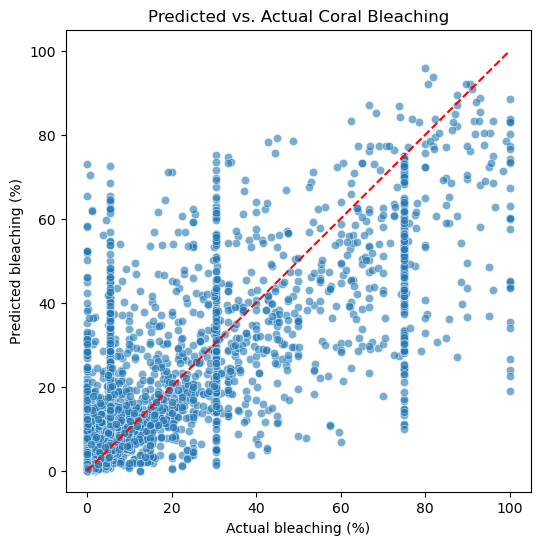

In [623]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=yc_test, y=yc_pred, alpha=0.6)
plt.plot([0,100],[0,100], color="red", linestyle="--")  # 1:1 line
plt.xlabel("Actual bleaching (%)")
plt.ylabel("Predicted bleaching (%)")
plt.title("Predicted vs. Actual Coral Bleaching")
plt.show()

In [624]:
model7_2.fit(Xw_train, yw_train)
yw_pred = model7_2.predict(Xw_test) 
r2_w = r2_score(yw_test, yw_pred) 
mae_w = mean_absolute_error(yw_test, yw_pred) 
mse_w = mean_squared_error(yw_test, yw_pred) 



print(f'R Squared Score: {r2_w}') 
print(f'Mean Absolute Error: {mae_w}') 
print(f'Mean Squared Error: {mse_w}') 
print(f'RMSE: {rmse_w}')

R Squared Score: 0.687683994047373
Mean Absolute Error: 4.294272517546628
Mean Squared Error: 109.64725940629901
RMSE: 12.010980673814968


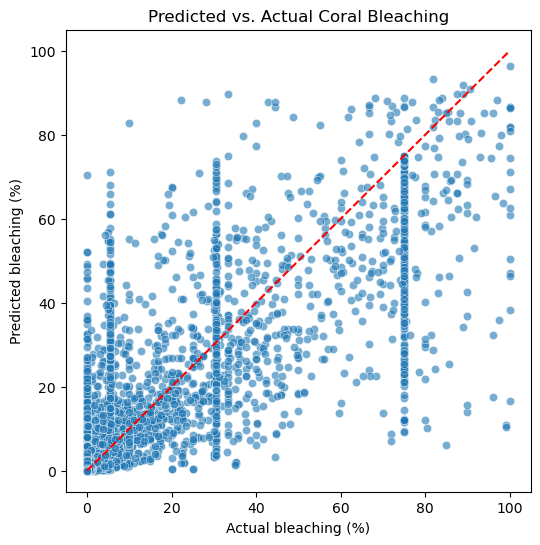

In [625]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=yw_test, y=yw_pred, alpha=0.6)
plt.plot([0,100],[0,100], color="red", linestyle="--")  # 1:1 line
plt.xlabel("Actual bleaching (%)")
plt.ylabel("Predicted bleaching (%)")
plt.title("Predicted vs. Actual Coral Bleaching")
plt.show()

Now we will be trying out XGBoost and stacking our models.  

In [627]:
model8 = XGBRegressor(n_estimators=500, learning_rate = 0.05, max_depth = 6, subsample = 0.8, colsample_bytree = 0.8, random_state = 42) 
model8 = XGBRegressor(n_estimators=500, learning_rate = 0.05, max_depth = 6, subsample = 0.8, colsample_bytree = 0.8, random_state = 42) 

In [628]:
model8.fit(Xc_train, yc_train) 
yc_pred = model8.predict(Xc_test) 
r2_c = r2_score(yc_test, yc_pred) 
mae_c = mean_absolute_error(yc_test, yc_pred) 
mse_c = mean_squared_error(yc_test, yc_pred) 
rmse_c = np.sqrt(mse_c)



print(f'R Squared Score: {r2_c}') 
print(f'Mean Absolute Error: {mae_c}') 
print(f'Mean Squared Error: {mse_c}') 
print(f'RMSE: {rmse_c}')

R Squared Score: 0.6733907742752272
Mean Absolute Error: 5.375090423611136
Mean Squared Error: 119.98320501088075
RMSE: 10.953684540412908


In [629]:
model8_2.fit(Xw_train, yw_train) 
yw_pred = model8_2.predict(Xw_test) 
r2_w = r2_score(yw_test, yw_pred) 
mae_w = mean_absolute_error(yw_test, yw_pred) 
mse_w = mean_squared_error(yw_test, yw_pred) 



print(f'R Squared Score: {r2_w}') 
print(f'Mean Absolute Error: {mae_w}') 
print(f'Mean Squared Error: {mse_w}') 
print(f'RMSE: {rmse_w}')

R Squared Score: 0.6739096794002871
Mean Absolute Error: 5.02617096884664
Mean Squared Error: 114.48311739137485
RMSE: 12.010980673814968


In [630]:
model9 = lgb.LGBMRegressor(n_estimators=1000, learning_rate=0.05, max_depth=-1, num_leaves=31, subsample=0.08, colsample_bytree= 0.08, random_state=42)
model9_2 = lgb.LGBMRegressor(n_estimators=1000, learning_rate=0.05, max_depth=-1, num_leaves=31, subsample=0.08, colsample_bytree= 0.08, random_state=42)

In [631]:
model9.fit(Xc_train, yc_train) 
yc_pred = model9.predict(Xc_test) 
r2_c = r2_score(yc_test, yc_pred) 
mae_c = mean_absolute_error(yc_test, yc_pred) 
mse_c = mean_squared_error(yc_test, yc_pred) 
rmse_c = np.sqrt(mse_c)



print(f'R Squared Score: {r2_c}') 
print(f'Mean Absolute Error: {mae_c}') 
print(f'Mean Squared Error: {mse_c}') 
print(f'RMSE: {rmse_c}')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000177 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5046
[LightGBM] [Info] Number of data points in the train set: 28066, number of used features: 30
[LightGBM] [Info] Start training from score 9.018032
R Squared Score: 0.6250272685749634
Mean Absolute Error: 6.312659740607536
Mean Squared Error: 137.75002836561833
RMSE: 11.736695802721409


In [632]:
model9_2.fit(Xw_train, yw_train) 
yw_pred = model9_2.predict(Xw_test) 
r2_w = r2_score(yw_test, yw_pred) 
mae_w = mean_absolute_error(yw_test, yw_pred) 
mse_w = mean_squared_error(yw_test, yw_pred) 



print(f'R Squared Score: {r2_w}') 
print(f'Mean Absolute Error: {mae_w}') 
print(f'Mean Squared Error: {mse_w}') 
print(f'RMSE: {rmse_w}')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007065 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5611
[LightGBM] [Info] Number of data points in the train set: 32970, number of used features: 55
[LightGBM] [Info] Start training from score 8.029287
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

Here is a stacked model with our Random Forest, NN, XGBoost, lgb models. 

In [634]:
estimators = [('model9',model9), ('model7',model7), ('model8',model8), ('model5',model5)] 
estimators_2 = [('model9',model9_2), ('model7',model7_2), ('model8',model8_2), ('model5',model5_2)]
stacked = StackingRegressor(estimators=estimators, final_estimator = lr, passthrough=True, n_jobs=-1) 
stacked_2= StackingRegressor(estimators=estimators, final_estimator = lr, passthrough=True, n_jobs=-1) 

In [635]:
stacked.fit(Xc_train, yc_train) 
yc_pred= stacked.predict(Xc_test)
r2_c = r2_score(yc_test, yc_pred) 
mae_c = mean_absolute_error(yc_test, yc_pred) 
mse_c = mean_squared_error(yc_test, yc_pred) 
rmse_c = np.sqrt(mse_c)



print(f'R Squared Score: {r2_c}') 
print(f'Mean Absolute Error: {mae_c}') 
print(f'Mean Squared Error: {mse_c}') 
print(f'RMSE: {rmse_c}')

R Squared Score: 0.6909967974309781
Mean Absolute Error: 4.988115942553595
Mean Squared Error: 113.51545419632515
RMSE: 10.654363153015067


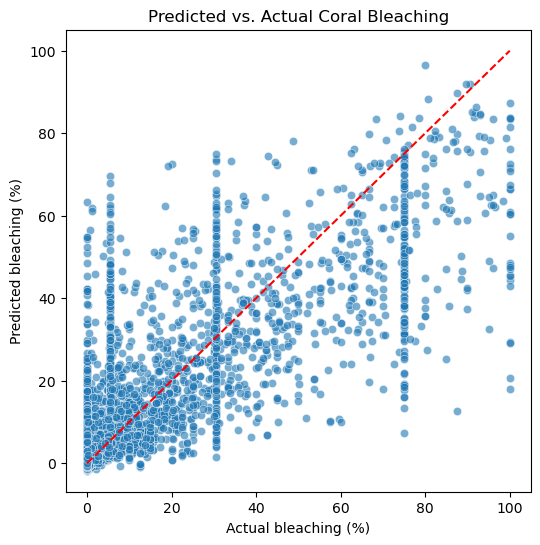

In [636]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=yc_test, y=yc_pred, alpha=0.6)
plt.plot([0,100],[0,100], color="red", linestyle="--")  # 1:1 line
plt.xlabel("Actual bleaching (%)")
plt.ylabel("Predicted bleaching (%)")
plt.title("Predicted vs. Actual Coral Bleaching")
plt.show()

In [637]:
stacked_2.fit(Xw_train, yw_train) 
yw_pred = stacked_2.predict(Xw_test)
r2_w = r2_score(yw_test, yw_pred) 
mae_w = mean_absolute_error(yw_test, yw_pred) 
mse_w = mean_squared_error(yw_test, yw_pred) 



print(f'R Squared Score: {r2_w}') 
print(f'Mean Absolute Error: {mae_w}') 
print(f'Mean Squared Error: {mse_w}') 
print(f'RMSE: {rmse_w}')

R Squared Score: 0.6938470120962721
Mean Absolute Error: 4.629218264750218
Mean Squared Error: 107.48355973720217
RMSE: 12.010980673814968


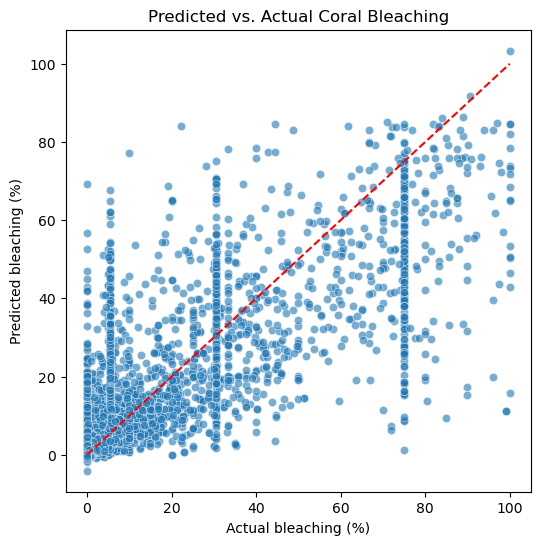

In [638]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=yw_test, y=yw_pred, alpha=0.6)
plt.plot([0,100],[0,100], color="red", linestyle="--")  # 1:1 line
plt.xlabel("Actual bleaching (%)")
plt.ylabel("Predicted bleaching (%)")
plt.title("Predicted vs. Actual Coral Bleaching")
plt.show()

In [639]:
model10 = make_pipeline(scaler, RandomForestRegressor(n_estimators=350, random_state=42))
model10_2 = make_pipeline(scaler, RandomForestRegressor(n_estimators=350, random_state=42))

In [640]:
model10.fit(Xc_train, yc_train) 
yc_pred= model10.predict(Xc_test)
r2_c = r2_score(yc_test, yc_pred) 
mae_c = mean_absolute_error(yc_test, yc_pred) 
mse_c = mean_squared_error(yc_test, yc_pred) 
rmse_c = np.sqrt(mse_c)



print(f'R Squared Score: {r2_c}') 
print(f'Mean Absolute Error: {mae_c}') 
print(f'Mean Squared Error: {mse_c}') 
print(f'RMSE: {rmse_c}')

R Squared Score: 0.6810903543300484
Mean Absolute Error: 4.711415210689058
Mean Squared Error: 117.15468634253862
RMSE: 10.823801843277556


Substrate_Name                           0.236468
SSTA_Standard_Deviation                  0.102933
Year                                     0.094977
Longitude_Degrees                        0.085947
SSTA_DHW                                 0.066076
Latitude_Degrees                         0.053141
Temperature_Kelvin                       0.044260
SSTA_Frequency                           0.034930
SSTA                                     0.033807
Turbidity                                0.022628
Temperature_Maximum                      0.020321
Temperature_Kelvin_Standard_Deviation    0.019935
Temperature_Mean                         0.019383
SSTA_Maximum                             0.017221
SSTA_DHWMax                              0.016886
SSTA_Minimum                             0.016570
Temperature_Minimum                      0.016099
SSTA_Frequency_Standard_Deviation        0.015613
SSTA_DHWMean                             0.014435
SSTA_DHW_Standard_Deviation              0.011293


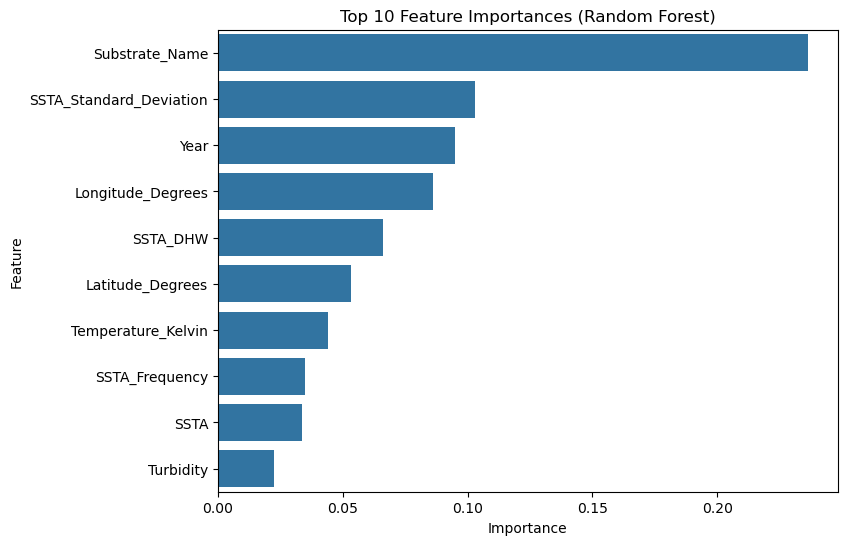

In [701]:
rf_model = model10.named_steps['randomforestregressor']
importances = rf_model.feature_importances_
features = Xc_train.columns

feat_importances = pd.Series(importances, index=features).sort_values(ascending=False)
print(feat_importances)

plt.figure(figsize=(8,6))
sns.barplot(x=feat_importances.values[:10], y=feat_importances.index[:10])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Top 10 Feature Importances (Random Forest)")
plt.show()

In [641]:
model10_2.fit(Xw_train, yw_train)
yw_pred = model10_2.predict(Xw_test)
r2_w = r2_score(yw_test, yw_pred) 
mae_w = mean_absolute_error(yw_test, yw_pred) 
mse_w = mean_squared_error(yw_test, yw_pred) 



print(f'R Squared Score: {r2_w}') 
print(f'Mean Absolute Error: {mae_w}') 
print(f'Mean Squared Error: {mse_w}') 
print(f'RMSE: {rmse_w}')

R Squared Score: 0.6890762455986379
Mean Absolute Error: 4.281049357006957
Mean Squared Error: 109.15847060236075
RMSE: 12.010980673814968


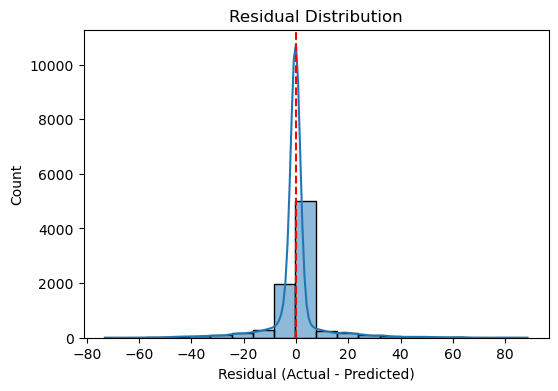

In [692]:
residuals = yw_test - yw_pred

plt.figure(figsize=(6,4))
sns.histplot(residuals, bins=20, kde=True)
plt.axvline(0, color="red", linestyle="--")
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Count")
plt.title("Residual Distribution")
plt.show()

Substrate_Name                           0.244873
Longitude_Degrees                        0.106491
SSTA_Standard_Deviation                  0.078691
Latitude_Degrees                         0.064451
SSTA_DHW                                 0.063221
Temperature_Kelvin                       0.038430
SSTA_Frequency                           0.030091
SSTA                                     0.027011
Temperature_Mean                         0.026624
Temperature_Kelvin_Standard_Deviation    0.023664
Transport_SO2                            0.021102
Temperature_Maximum                      0.020642
SSTA_Maximum                             0.017374
SSTA_DHWMean                             0.017129
Temperature_Minimum                      0.017087
SSTA_DHWMax                              0.016049
SSTA_Minimum                             0.015821
SSTA_Frequency_Standard_Deviation        0.015318
SSTA_DHW_Standard_Deviation              0.014166
Power industry_NOx                       0.013858


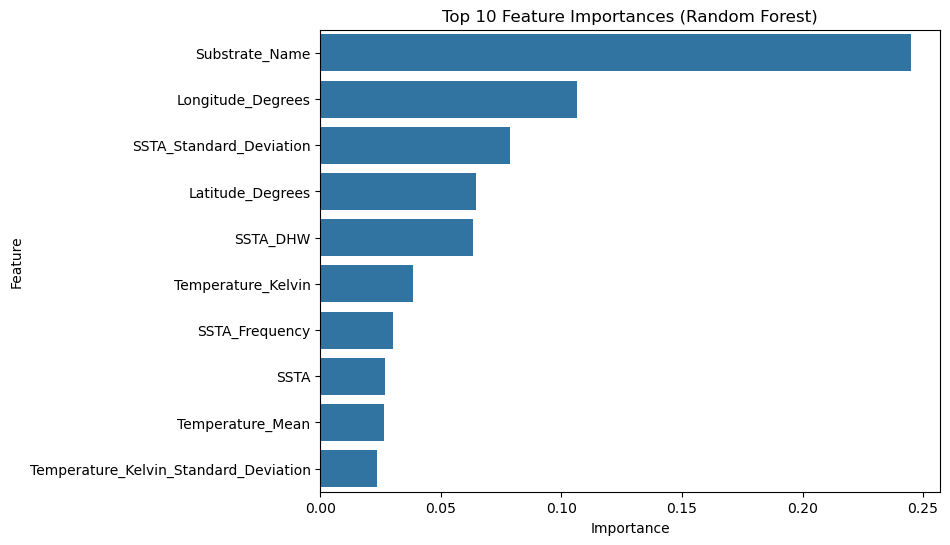

In [697]:
rf_model = model10_2.named_steps['randomforestregressor']
importances = rf_model.feature_importances_
features = Xw_train.columns

feat_importances = pd.Series(importances, index=features).sort_values(ascending=False)
print(feat_importances)

plt.figure(figsize=(8,6))
sns.barplot(x=feat_importances.values[:10], y=feat_importances.index[:10])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Top 10 Feature Importances (Random Forest)")
plt.show()

Oh wow! That is incredibly interesting. I would like to explore these features more in the future. I would also like to add more ocean ecological data. I wasn't expecting longitude to be more important than latitude. latitude is the position in eraltion to the equator. Future projects should explore how different substrate types are impacted by pollution. It seems that pollution levels are not as strong of an indicator for coral reef bleaching. In the earlier graph depicting feature importance, year is listed as a key feature. This could be from pollution levels changing over the years. 

Environmental data is complex and hard to model with high accuracy. Despite this, our models preformed very well and we are able to predict coral reef bleaching within 4 percentage points. With Random Forest and our stacked model we an accuracy that is considered high with this type of data. Our graphs throughout the notebook are pretty consistent in structure. Our model is really good at predicting lower bleaching percentages, but doesn't preform well with hgiher values. As we get closer to the high values, more points are under the red line. This shows that our model predicts values as lower than the actual values. The residual distribution confirms our model's underfitting. Most of the residuals are on the right of the dotted line, showing underfitting values. The ones on the left show overfitting.